<a href="https://colab.research.google.com/github/Sandramcrs08/ClassificacaoRegressao/blob/main/Classifica%C3%A7%C3%A3oRegress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos de Classificação e Regressão
Logística**

*Desafio Final*

1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn):

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix






a. Faça uma análise inicial sobre esse dataset.

In [ ]:
# Carregar o conjunto de dados iris
iris = datasets.load_iris()

# Extrair os recursos e rótulos alvo
X = iris.data
y = iris.target


In [ ]:
# Análise Exploratória:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.describe())  # Estatísticas resumidas

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
# Estrutura
print(iris.feature_names)  # Nomes das características
print(iris.target_names)   # Nomes das espécies
print(iris.data.shape)     # Formato dos dados
print(iris.target.shape)   # Formato dos alvos


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [ ]:
# Colunas
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [ ]:
# Conta o número de amostras em cada classe
contagem_classes = dict()
for i in range(len(iris.target)):
  classe = iris.target[i]
  if classe not in contagem_classes:
    contagem_classes[classe] = 0
  contagem_classes[classe] += 1

# Imprime o resultado
for classe, contagem in contagem_classes.items():
  print(f"Classe {iris.target_names[classe]}: {contagem}")

Classe setosa: 50
Classe versicolor: 50
Classe virginica: 50


In [ ]:
# Verificar se há valores ausentes
valores_ausentes = iris_df.isnull().sum()
print(valores_ausentes)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


 b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

In [ ]:
print(iris_df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


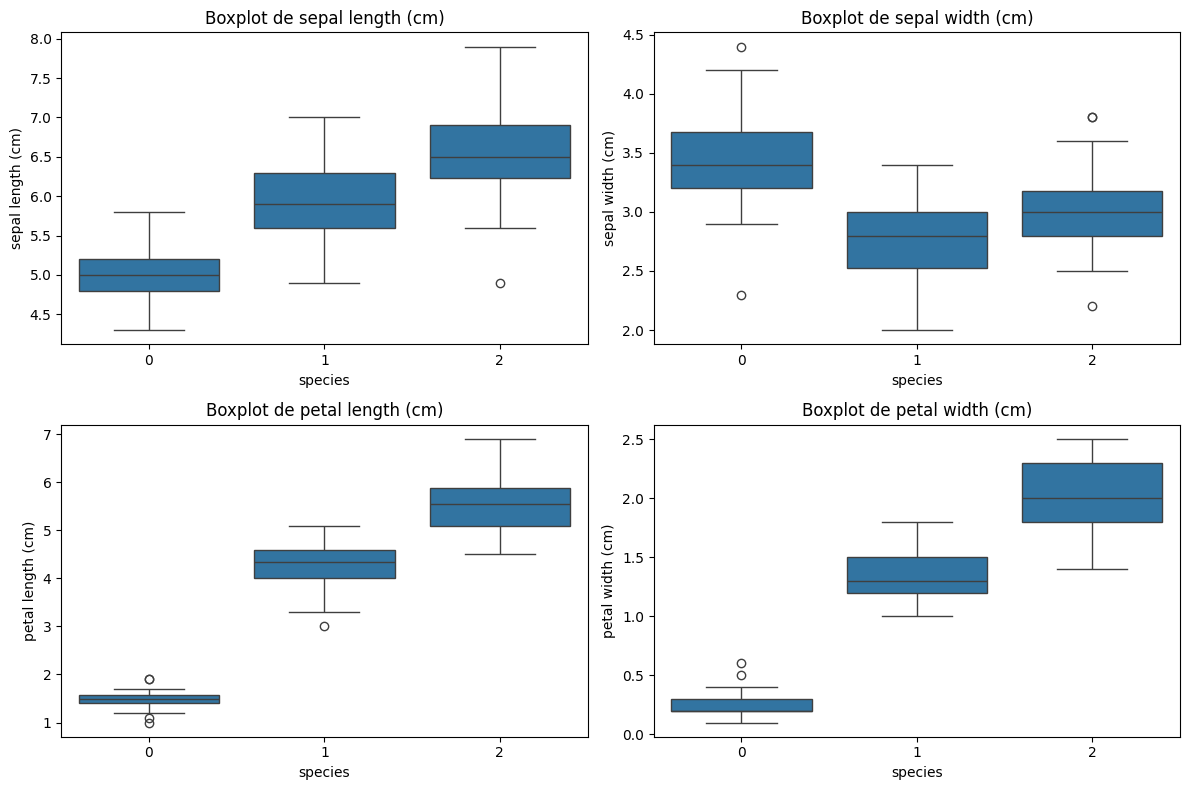

In [ ]:
iris_df['species'] = iris.target

# Boxplot para cada característica por espécie
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title('Boxplot de ' + feature)
plt.tight_layout()
plt.show()

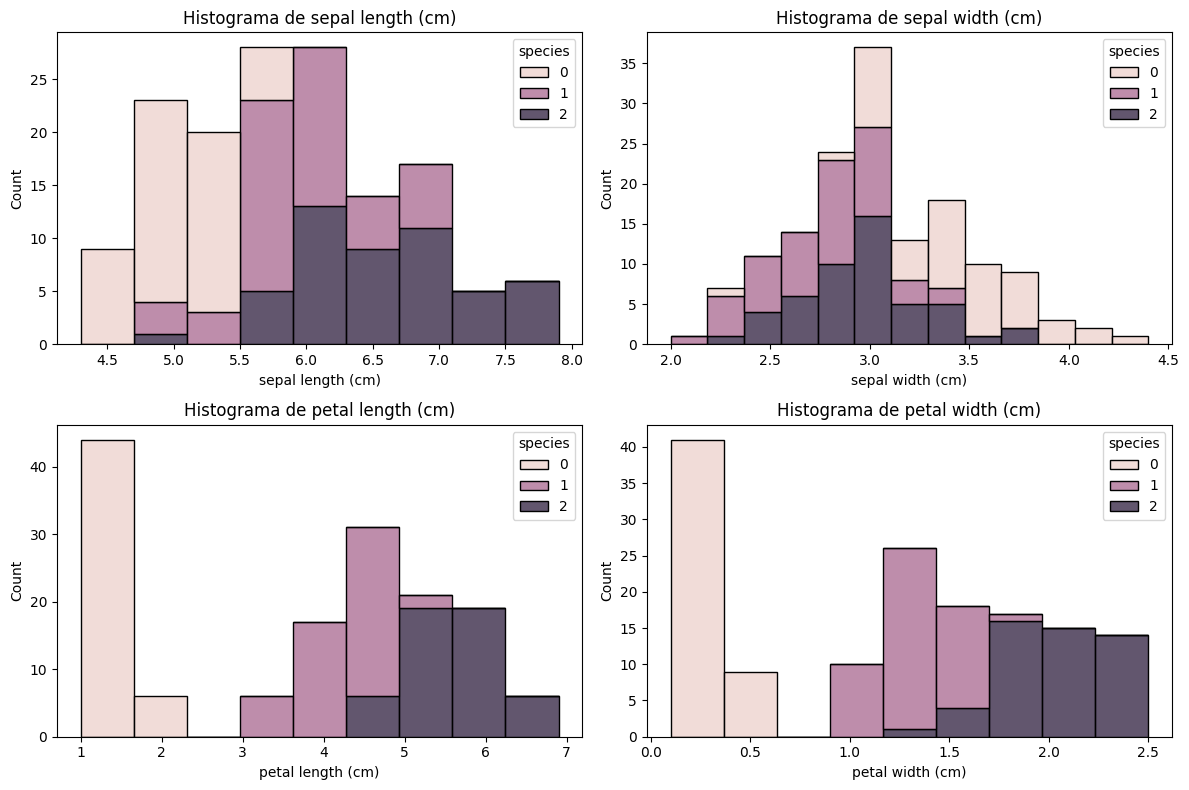

In [ ]:
# Histogramas para cada característica por espécie
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris_df, x=feature, hue='species', multiple='stack')
    plt.title('Histograma de ' + feature)
plt.tight_layout()
plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?

*Resposta: Sim. Aqui estão algumas observações que podem ser feitas a partir desses gráficos:*

**Comprimento da Pétala (Petal_Length):**
Íris Setosa geralmente tem um comprimento de pétala significativamente menor em comparação com as outras duas espécies. Íris Versicolour e Íris Virginica podem ter alguma sobreposição, mas muitas vezes é possível diferenciá-las pelo comprimento da pétala.

**Largura da Pétala (Petal_Width):**
Similar ao comprimento da pétala, a largura da pétala também oferece uma boa separação entre as espécies. Setosa tende a ter a menor largura, enquanto Virginica geralmente tem a maior.

**Comprimento da Sépala (Sepal_Length) e Largura da Sépala (Sepal_Width):**
A largura da sépala pode ser especialmente útil para diferenciar a Íris Setosa, que tende a ter sépalas mais largas.

d. Aplique a regressão logística para avaliar o modelo de classificação.

In [ ]:
# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
logistic_model = LogisticRegression(max_iter=200)

# Treinar o modelo com os dados de treino
logistic_model.fit(X_train, y_train)

# Prever os resultados para o conjunto de teste
y_pred = logistic_model.predict(X_test)

# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Relatório de classificação
print('\nRelatório de Classificação:\n', class_report)



Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



e. Calcule a acurácia, precisão e recall.


In [ ]:
# Calculando a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia:.2f}')

# Calculando a precisão para cada classe individualmente
precisao = precision_score(y_test, y_pred, average='macro')
print(f'Precisão: {precisao:.2f}')

# Calculando o recall para cada classe individualmente
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.2f}')

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00


f. Plote a matriz de confusao com matplotlib ou seaborn

In [ ]:
# Imprimir a matriz de confusão e o relatório de classificação
print('Matriz de Confusão:\n', conf_matrix)

Matriz de Confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


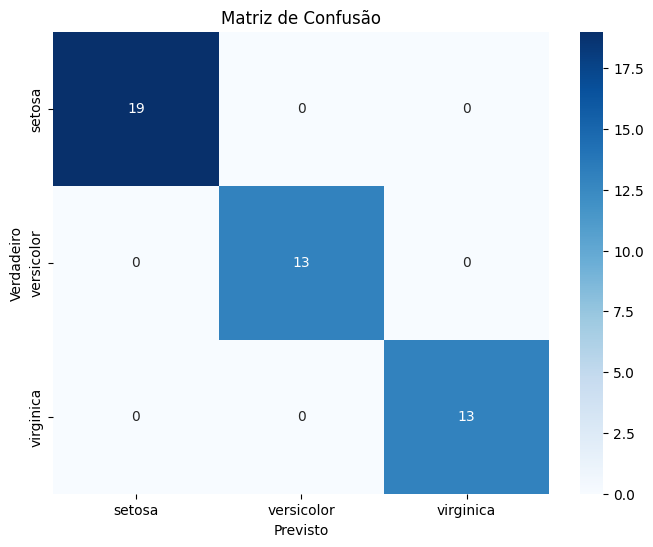

In [ ]:
# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()


2. Utilizando o dataset load_digits. Exemplo de como fazer a importação do dataset usando o sklearn:
from sklearn.datasets import load_digits
digits = load_digits()

Responda:

a. Faça uma análise inicial sobre esse dataset

i. Quantos dados possui?
-Possui 1797 imagens.

ii. Existem dados nulos? Se sim quantos?
-Não há dados nulos.

iii. Todos são dados numéricos ou existem colunas com dados categóricos?
-Todos os dados são numéricos

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [ ]:
# Carregando o dataset
digits = load_digits()

# Análise inicial
print("Número de imagens no dataset:", len(digits.images))
print("Forma de uma imagem:", digits.images[0].shape)
print("Primeira imagem do dataset (em valores de pixels):", digits.images[0])

# Verificando a presença de dados nulos
print("Dados nulos no dataset:", np.isnan(digits.data).any())

# Verificando os tipos de dados
print("Tipos de dados das características:", digits.data.dtype)


Número de imagens no dataset: 1797
Forma de uma imagem: (8, 8)
Primeira imagem do dataset (em valores de pixels): [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Dados nulos no dataset: False
Tipos de dados das características: float64


b. Aplique a regressão logística para avaliar o modelo de classificação.

In [ ]:
# Carregando o dataset
digits = load_digits()

# Dividindo o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Criando uma instância do modelo de regressão logística
logisticRegr = LogisticRegression(max_iter=10000)

# Treinando o modelo com os dados de treino
logisticRegr.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
predictions = logisticRegr.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, predictions)
print(f'A acurácia do modelo é: {accuracy:.2f}')


A acurácia do modelo é: 0.97


c. Calcule a acurácia, precisão e recall.


In [ ]:
# Calculando a acurácia
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy:.2f}')

# Calculando a precisão
precision = precision_score(y_test, predictions, average='macro')
print(f'Precisão: {precision:.2f}')

# Calculando o recall
recall = recall_score(y_test, predictions, average='macro')
print(f'Recall: {recall:.2f}')


Acurácia: 0.97
Precisão: 0.97
Recall: 0.97


d. Plote a matriz de confusão com matplotlib ou seaborn



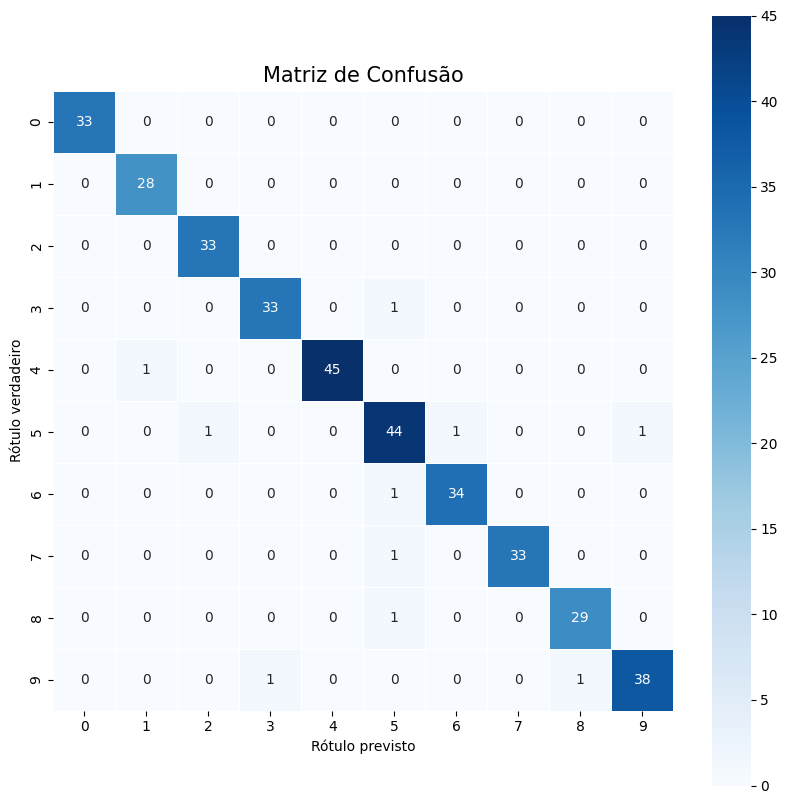

In [ ]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Plotando a matriz de confusão com matplotlib
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Rótulo verdadeiro')
plt.xlabel('Rótulo previsto')
plt.title('Matriz de Confusão', size = 15)
plt.show()


e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.

In [ ]:
# Dividindo o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Criando uma instância do modelo de regressão logística
logisticRegr = LogisticRegression(max_iter=10000)

# Treinando o modelo com os dados de treino
logisticRegr.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
predictions = logisticRegr.predict(X_test)


f. Calcule a acurácia, precisão e recall.

In [ ]:
# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')

# Exibindo as métricas
print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')



Acurácia: 0.97
Precisão: 0.97
Recall: 0.97


g. Plote a matriz de confusao com matplotlib ou seaborn.

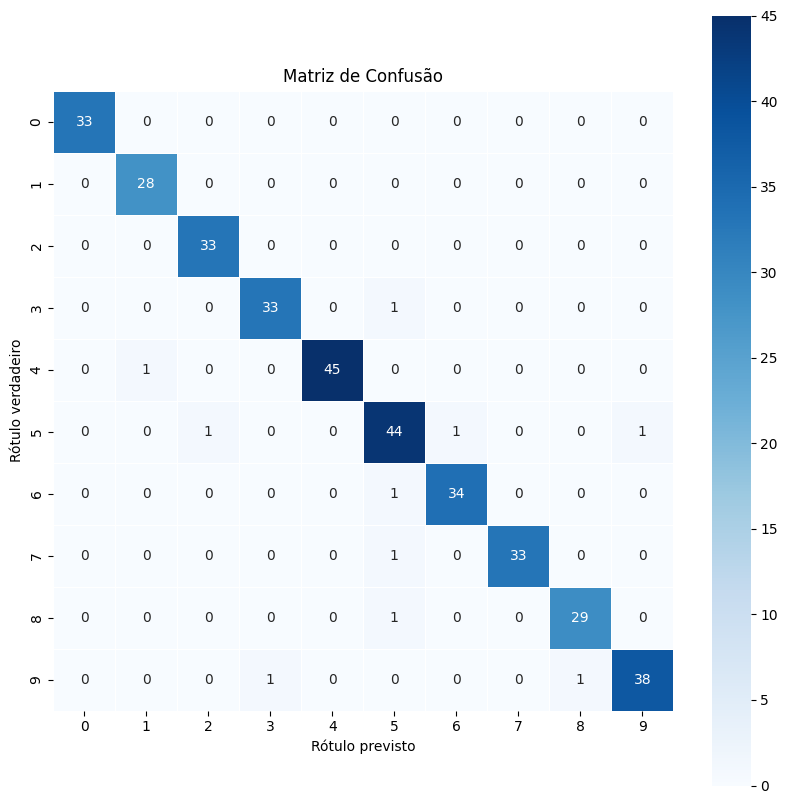

In [ ]:
# Calculando e plotando a matriz de confusão
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Rótulo verdadeiro')
plt.xlabel('Rótulo previsto')
plt.title('Matriz de Confusão')
plt.show()
